In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# For inline plots in Jupyter Notebook
%matplotlib inline


df = pd.read_csv('.\\AB_NYC_2019.csv')

# %% [markdown]
# ## Step 2: Data Integrity – Checking Data Types and Consistency
# - We ensure that numerical fields (e.g., id, host_id, price, etc.) are in the correct format.
# - Convert `last_review` into a datetime object (invalid/missing dates become NaT).

# %% [code]
print("Data types before cleaning:")
print(df.dtypes)

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

Data types before cleaning:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [4]:
# ## Step 3: Missing Data Handling
# - We check for missing values.
# - Here, 'last_review' and 'reviews_per_month' have missing values.
# - We fill missing 'reviews_per_month' with 0, assuming no reviews were recorded.
# - We leave 'last_review' as missing (NaT) because it may be legitimate.

# %% [code]
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# Convert all column names to lower case, strip extra spaces, and replace spaces with underscores.
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Step 3: Data Integrity – Convert Data Types
# ========================
# Convert 'last_review' to a datetime object. Errors are coerced to NaT.
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [8]:
# Handle missing values:
# a) For critical text fields 'name' and 'host_name', drop rows with missing values.
df = df.dropna(subset=['name', 'host_name'])

# b) For 'reviews_per_month': missing likely indicates no reviews. Fill these with 0.
# df['reviews_per_month'].fillna(0, inplace=True)  old version
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# c) 'last_review' will remain as NaT when missing, reflecting that there is no review date.
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [9]:
# Step 5: Duplicate Removal
# ========================
df = df.drop_duplicates()

# ========================
# Step 6: Standardization – Formatting Text Columns
# ========================
# Format text columns to a consistent title case
df['name'] = df['name'].str.title()
df['host_name'] = df['host_name'].str.title()

print("\nColumns after standardization:")
print(df.columns)
display(df.head())


Columns after standardization:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Summary statistics for key numerical columns:
              price  minimum_nights  number_of_reviews  availability_365
count  48858.000000    48858.000000       48858.000000      48858.000000
mean     152.740309        7.012444          23.273098        112.801425
std      240.232386       20.019757          44.549898        131.610962
min        0.000000        1.000000           0.000000          0.000000
25%       69.000000        1.000000           1.000000          0.000000
50%      106.000000        3.000000           5.000000         45.000000
75%      175.000000        5.000000          24.000000        227.000000
max    10000.000000     1250.000000         629.000000        365.000000


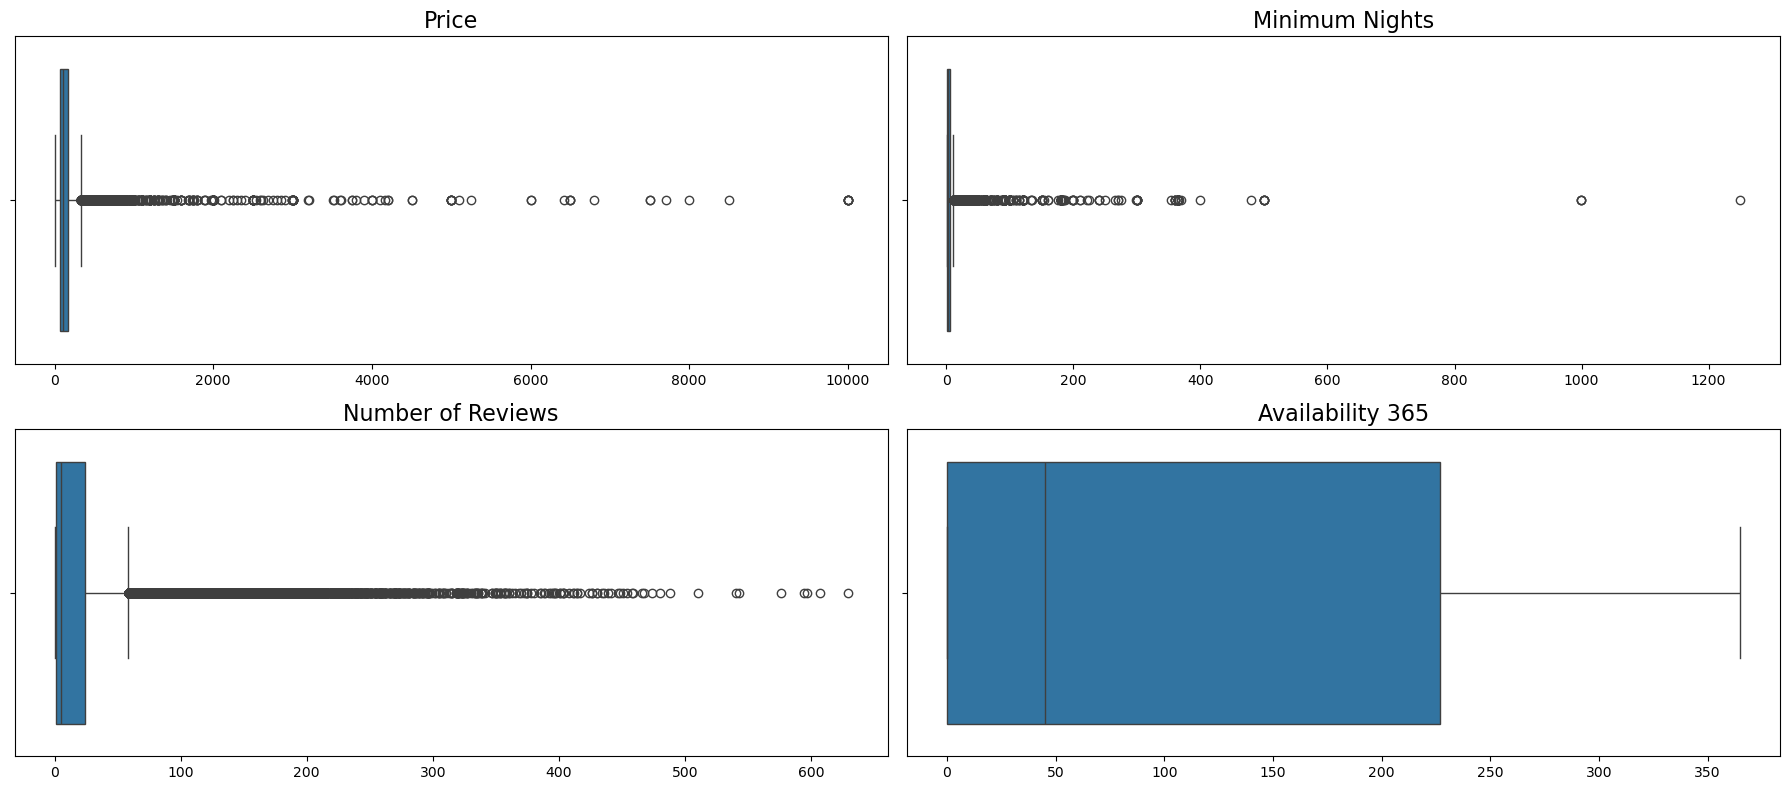

Final Cleaned DataFrame:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Step 7: Outlier Detection
# ========================
# Check summary statistics for key numerical columns to identify potential outliers.
print("\nSummary statistics for key numerical columns:")
print(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe())

plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Price', fontsize=16)
plt.xlabel('', fontsize=14)

plt.subplot(2, 2, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title('Minimum Nights', fontsize=16)
plt.xlabel('', fontsize=14)

plt.subplot(2, 2, 3)
sns.boxplot(x=df['number_of_reviews'])
plt.title('Number of Reviews', fontsize=16)
plt.xlabel('', fontsize=14)

plt.subplot(2, 2, 4)
sns.boxplot(x=df['availability_365'])
plt.title('Availability 365', fontsize=16)
plt.xlabel('', fontsize=14)

plt.tight_layout()
plt.show()

# ========================
# Final Cleaned DataFrame
# ========================
print("Final Cleaned DataFrame:")
display(df.head())

In [12]:
print("Final Cleaned DataFrame:")
display(df.head())

Final Cleaned DataFrame:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
